<a href="https://colab.research.google.com/github/NooshinS/Incubator/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Dataset
df=pd.read_csv('Advertising.csv')
x=df.iloc[ :, 1:-1].values
y=df.iloc[ : , -1].values
display(df.describe())
display(df.info())
display(df)


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


None

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


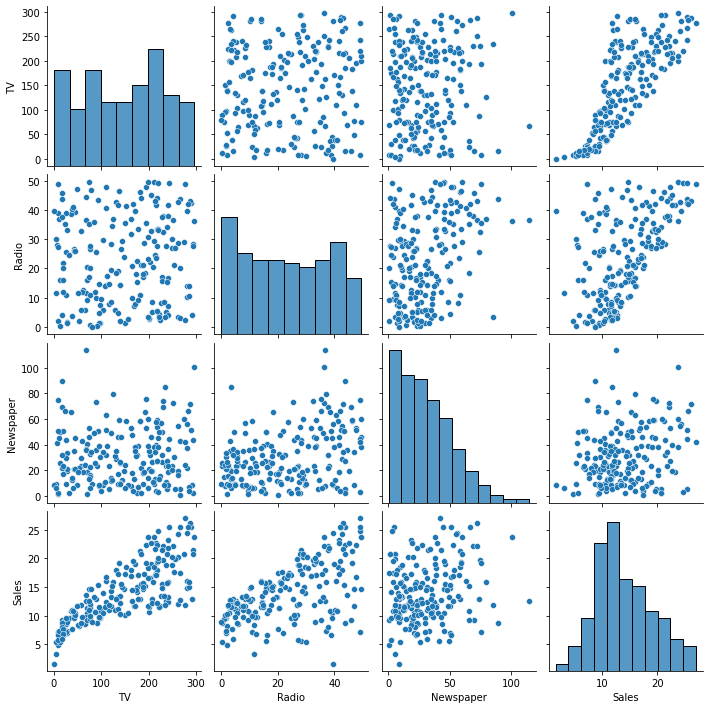

In [ ]:
df1=pd.DataFrame(df)
df1.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
sns.pairplot(df1)

1.Linearity Assumption

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


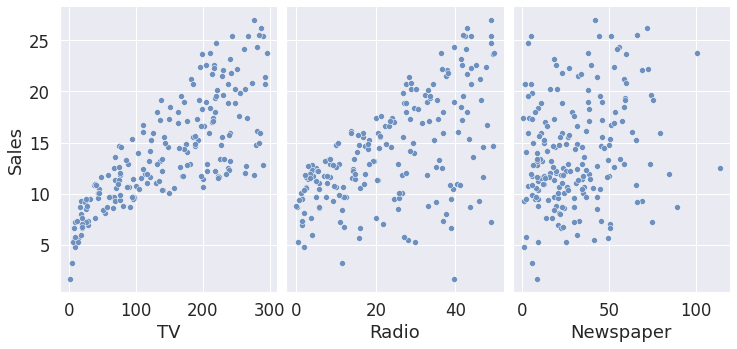

In [ ]:
sns.set(context="notebook", palette="vlag", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
sns.pairplot(df1, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5, aspect=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


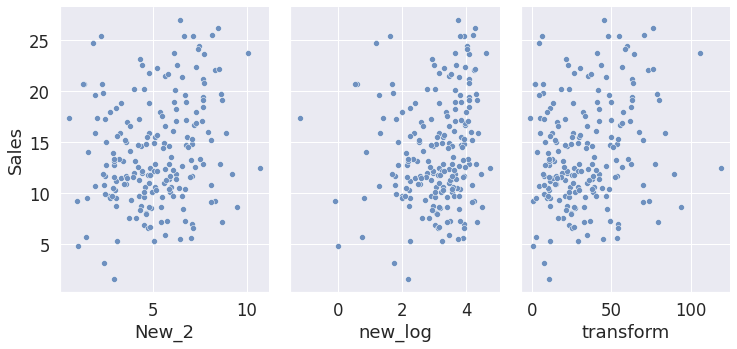

In [ ]:
#Newspaper doesnot have a linear relationship with sales. Therefore, some transformation is used to train the models
df1['New_2']=df1['Newspaper']**.5
df1["new_log"]= np.log(df1['Newspaper'])
df1["transform"]= np.log(df1['Newspaper'])+df1['Newspaper']
df.head()
sns.pairplot(df1, x_vars=['New_2','new_log','transform'],y_vars=['Sales'], size=5, aspect=0.7)

In [ ]:
#After tarnsforming the shape of column newspaper does not change so remove this columns
df1.drop(columns= ['New_2','new_log','transform', 'Newspaper'], axis=1, inplace=True)
df1.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9


Split the dataset

In [ ]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 0,test_size=0.20)

Scaling the dataset

In [ ]:
###Talieh Code
#Calculate the average and standard deviation
#Norm=pd.DataFrame({'Media':['TV','Radio','Newspaper'],'mean':np.round(np.mean(x_train, axis=0),decimals=3),'STD':np.round(np.std(x_train, axis=0),decimals=3)})
#Norm
#Scaling
#x_testSC=StandardScaler(x_test)
#x_testSC
#####Nooshin#####
SC= StandardScaler()
xSC_train= SC.fit_transform(x_train)
xSC_test= SC.fit_transform(x_test)
#y_train=y_train.reshape(len(y_train),1)
#sc_y=StandardScaler()
#y_train=sc_y.fit_transform(y_train)

Taining the Data

In [ ]:
#Train 
Regressor= LinearRegression()
Regressor.fit(xSC_train,y_train )
y_pred=Regressor.predict(xSC_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[11.08042581 11.3       ]
 [ 8.57343776  8.4       ]
 [ 8.15879965  8.7       ]
 [24.58135699 25.4       ]
 [12.97096769 11.7       ]
 [ 7.69489354  8.7       ]
 [13.70600703  7.2       ]
 [15.94537417 13.2       ]
 [11.76873223  9.2       ]
 [17.13178106 16.6       ]
 [23.42889215 24.2       ]
 [10.18859851 10.6       ]
 [11.47372715 10.5       ]
 [16.30736957 15.6       ]
 [12.55127043 11.8       ]
 [13.11671676 13.2       ]
 [19.46267102 17.4       ]
 [11.77596706  1.6       ]
 [16.70931294 14.7       ]
 [18.05859285 17.        ]
 [24.57024897 26.2       ]
 [10.63992212 10.3       ]
 [15.96998765 14.9       ]
 [13.32395307 12.9       ]
 [ 6.90097179  8.1       ]
 [16.07496141 15.2       ]
 [13.23498612 12.6       ]
 [21.55685746 22.6       ]
 [14.31007566 11.6       ]
 [10.10589173  8.5       ]
 [13.81648354 12.5       ]
 [22.0034185  23.7       ]
 [18.86260696 16.1       ]
 [21.78054154 21.8       ]
 [ 7.72605172  5.6       ]
 [ 7.31151845  6.7       ]
 [ 8.9972093   9.7       ]
 

2.Mean of Residual Assumption

In [ ]:
Residual=y_test-y_pred
MEAN_Residual=np.mean(Residual)
print(MEAN_Residual)
#the value of residula is not zero or near zero so this assumption is not satisfied

-0.9750000000000048


3.Homoscedasticity Assumption

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


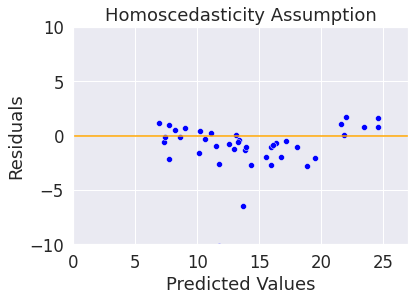

In [ ]:
sns.scatterplot(y_pred,Residual, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,27)
p = sns.lineplot([0,27],[0,0],color='orange')
p = plt.title('Homoscedasticity Assumption')

In [ ]:
test = sms.het_goldfeldquandt(Residual, x_test)
print(test)
#P-values is greater than 0.05 so accept null hypothesis
#null hupothesis: there are homoscedasticity

(0.37637317952825405, 0.9743025925204998, 'increasing')


4.Normality of Residual Assumption

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality of Residual')

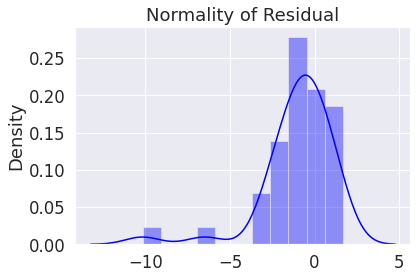

In [ ]:
#checking Normality
sns.distplot(Residual,kde=True, color='blue')
plt.title('Normality of Residual')

5.No Autocorrelation of Residuals Assumption

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


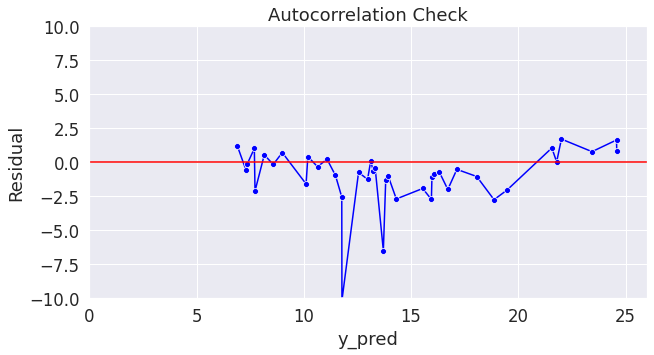

In [ ]:
#Method 1
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,Residual,marker='o',color='blue')
plt.xlabel('y_pred')
plt.ylabel('Residual')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Autocorrelation Check')
#There should not be autocorrelation in the data so the error terms should not form any pattern
#There is autocorrelation

In [ ]:
#Method 2
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(Residual , lags = 39)[1])
#Null Hypothesis: Autocorrelation is absent.
#Alternative Hypothesis: Autocorrelation is present.
#P-values less than 0.05 reject the null

0.03819162909487832

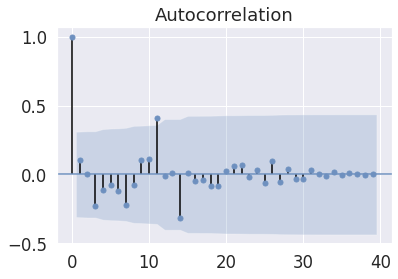

In [ ]:
#Method 3
sm.graphics.tsa.plot_acf(Residual, lags=39)
plt.show()
#The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data

6.No Perfect Multicollinearity Assumption

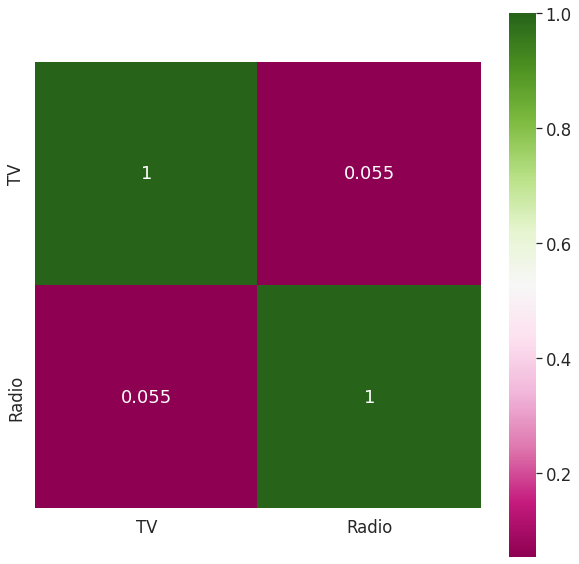

In [ ]:
df1.drop(columns= ['Sales'], axis=1, inplace=True)
plt.figure(figsize=(10,10)) 
sns.heatmap(df1.corr(), annot=True,cmap='PiYG',square=True)